C:\Users\usuario\AppData\Local\Temp\ipykernel_17064\1854267150.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("defunciones_filtradas.csv")



=== Evaluación con partición 70/30 ===

Modelo: RF Base - 70/30
Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.48      0.42      0.45     10038
        I219       0.60      0.67      0.64     18579
        J189       0.67      0.63      0.65     14100

    accuracy                           0.60     42717
   macro avg       0.59      0.57      0.58     42717
weighted avg       0.60      0.60      0.60     42717



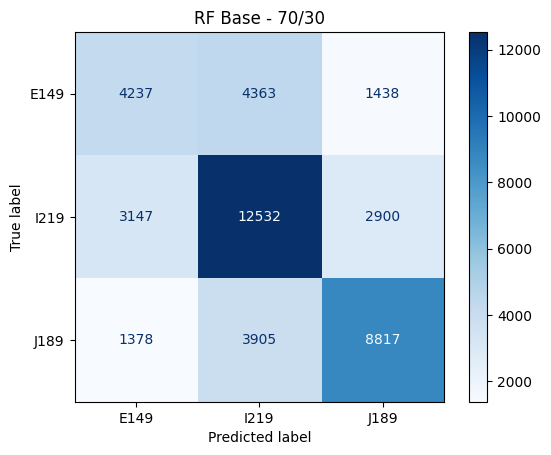


Modelo: RF Profundidad Lim: 5 - 70/30
Accuracy: 0.53
              precision    recall  f1-score   support

        E149       1.00      0.00      0.01     10038
        I219       0.48      0.98      0.65     18579
        J189       0.90      0.31      0.47     14100

    accuracy                           0.53     42717
   macro avg       0.79      0.43      0.37     42717
weighted avg       0.74      0.53      0.44     42717



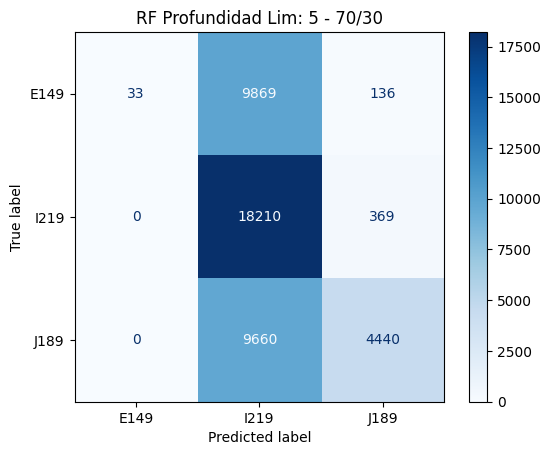


Modelo: RF Estimadores Altos - 70/30
Accuracy: 0.58
              precision    recall  f1-score   support

        E149       0.67      0.05      0.10     10038
        I219       0.53      0.88      0.66     18579
        J189       0.72      0.55      0.62     14100

    accuracy                           0.58     42717
   macro avg       0.64      0.50      0.46     42717
weighted avg       0.62      0.58      0.52     42717



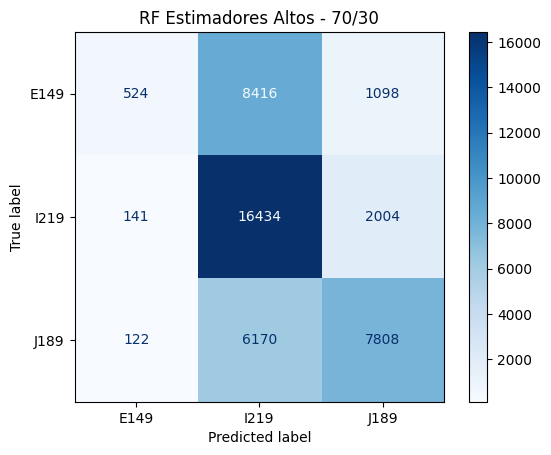


=== Evaluación con partición 80/20 ===

Modelo: RF Base - 80/20
Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.49      0.42      0.45      6711
        I219       0.60      0.68      0.64     12316
        J189       0.67      0.62      0.65      9451

    accuracy                           0.60     28478
   macro avg       0.59      0.57      0.58     28478
weighted avg       0.60      0.60      0.60     28478



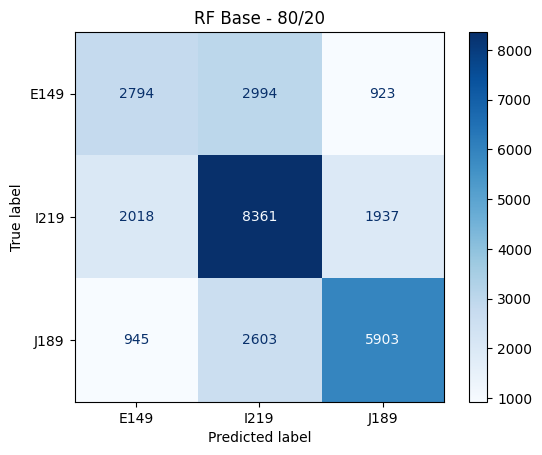


Modelo: RF Profundidad Lim: 5 - 80/20
Accuracy: 0.53
              precision    recall  f1-score   support

        E149       1.00      0.00      0.00      6711
        I219       0.48      0.99      0.64     12316
        J189       0.93      0.29      0.45      9451

    accuracy                           0.53     28478
   macro avg       0.80      0.43      0.36     28478
weighted avg       0.75      0.53      0.43     28478



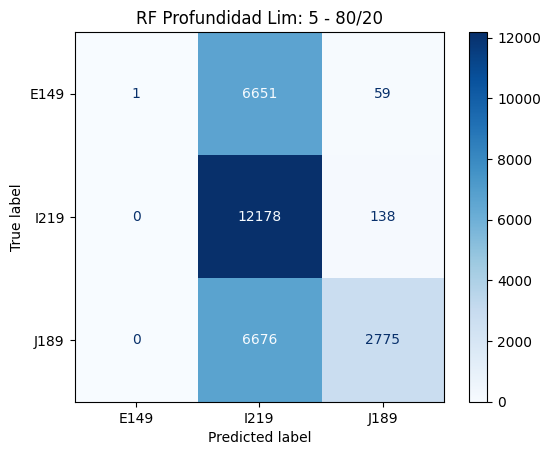


Modelo: RF Estimadores Altos - 80/20
Accuracy: 0.58
              precision    recall  f1-score   support

        E149       0.67      0.05      0.09      6711
        I219       0.53      0.88      0.66     12316
        J189       0.72      0.56      0.63      9451

    accuracy                           0.58     28478
   macro avg       0.64      0.50      0.46     28478
weighted avg       0.62      0.58      0.51     28478



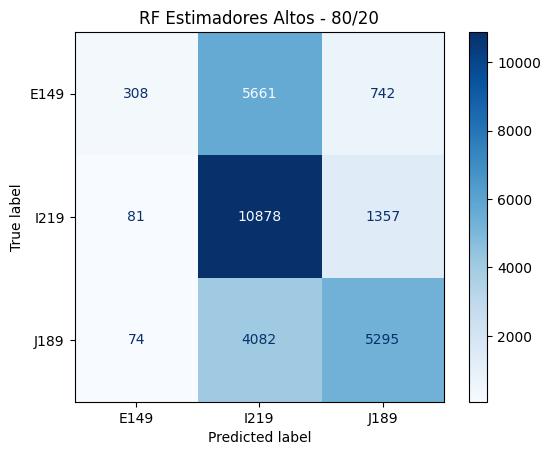


=== Evaluación con partición 85/15 ===

Modelo: RF Base - 85/15
Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.49      0.43      0.46      5088
        I219       0.60      0.68      0.64      9168
        J189       0.67      0.62      0.65      7103

    accuracy                           0.60     21359
   macro avg       0.59      0.58      0.58     21359
weighted avg       0.60      0.60      0.60     21359



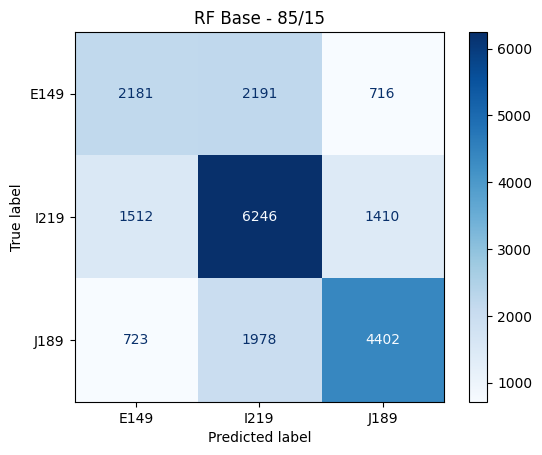


Modelo: RF Profundidad Lim: 5 - 85/15
Accuracy: 0.52
              precision    recall  f1-score   support

        E149       1.00      0.00      0.00      5088
        I219       0.47      0.99      0.64      9168
        J189       0.93      0.29      0.44      7103

    accuracy                           0.52     21359
   macro avg       0.80      0.43      0.36     21359
weighted avg       0.75      0.52      0.42     21359



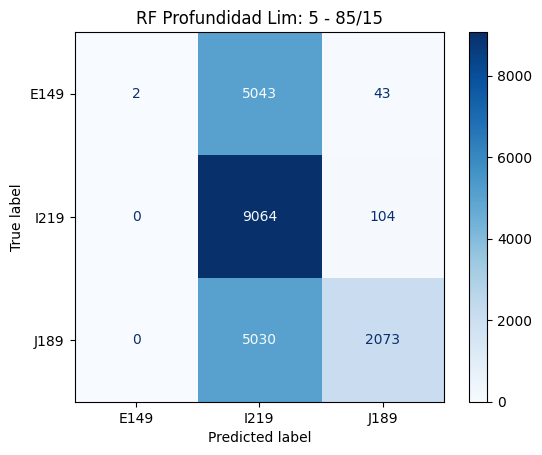


Modelo: RF Estimadores Altos - 85/15
Accuracy: 0.57
              precision    recall  f1-score   support

        E149       0.65      0.04      0.08      5088
        I219       0.52      0.88      0.66      9168
        J189       0.71      0.56      0.63      7103

    accuracy                           0.57     21359
   macro avg       0.63      0.49      0.45     21359
weighted avg       0.62      0.57      0.51     21359



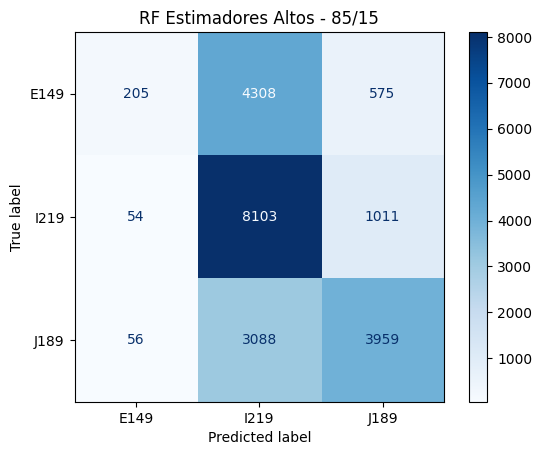

In [1]:
# Clasificación de causa de muerte con Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = pd.read_csv("defunciones_filtradas.csv")

# 2. Nombre de la columna objetivo
target_col = "causa"

# 3. Preprocesamiento
X = df.drop(columns=[target_col], errors="ignore")
y = df[target_col]

# Codificar variables categóricas
X = pd.get_dummies(X)

# Rellenar NaNs con 0
X = X.fillna(0)

# Codificar la columna objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Escalar variables (opcional para RandomForest, pero incluido por consistencia)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para mostrar matriz de confusión
def mostrar_matriz_confusion(y_test, y_pred, clases, titulo):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(titulo)
    plt.show()

# Función para entrenar y evaluar el modelo

def entrenar_random_forest(X_train, X_test, y_train, y_test, params, titulo):
    modelo = RandomForestClassifier(**params, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    print(f"\nModelo: {titulo}")
    print(f"Accuracy: {acc:.2f}")
    print(report)
    mostrar_matriz_confusion(y_test, y_pred, le.classes_, titulo)
    return acc

# Modelos con distintos hiperparámetros
modelos = {
    "RF Base": {"n_estimators": 100},
    "RF Profundidad Lim: 5": {"n_estimators": 100, "max_depth": 5},
    "RF Estimadores Altos": {"n_estimators": 300, "max_depth": 10}
}

# Divisiones de datos
splits = {
    "70/30": 0.30,
    "80/20": 0.20,
    "85/15": 0.15
}

# Evaluar todos los modelos con todas las divisiones
for nombre_split, test_size in splits.items():
    print(f"\n=== Evaluación con partición {nombre_split} ===")
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=test_size, random_state=42)
    for nombre_modelo, params in modelos.items():
        titulo = f"{nombre_modelo} - {nombre_split}"
        entrenar_random_forest(X_train, X_test, y_train, y_test, params, titulo)


Siendo:

- E149 -- Diabetes
- I219 -- Infarto
- J189 -- Neumonía